In [2]:
import sys
import os
import logging
from importlib import reload
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"
logging.basicConfig(
    level=logging.DEBUG, format="%(asctime)s - %(name)s - %(levelname)s - %(message)s"
)

module_path = os.path.abspath(os.path.join(".."))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
import pandas as pd

2024-03-19 13:58:43,449 - numexpr.utils - INFO - Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
2024-03-19 13:58:43,450 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


# Load Dictionary (Maxquant freshfrozen)

In [38]:
maxquant_ref_path = "/cmnfs/proj/ORIGINS/data/brain/txt_3x13Brainregions_MBR_LFQ_iBAQ/evidence_freshfrozen.txt"
try:
    df = pd.read_csv(maxquant_ref_path, sep="\t", low_memory=False)
except FileNotFoundError:
    print("File not found, creating it")
    maxquant_ref_ori_path = os.path.join(
        os.path.dirname(maxquant_ref_path), "evidence.txt"
    )
    chunk_size = 1000000
    exp_list = ["P064064", "P064051", "P064428"]
    df_list = []
    for chunk in pd.read_csv(
        maxquant_ref_ori_path, sep="\t", chunksize=chunk_size, low_memory=False
    ):
        chunk = chunk.loc[chunk["Experiment"].isin(exp_list)]
        df_list.append(chunk)
    df = pd.concat(df_list)
    df.to_csv(
        maxquant_ref_path,
        sep="\t",
        index=False,
    )

In [42]:
# deduplicate
df_modseq_charge = df.drop_duplicates(subset=["Modified sequence", "Charge"])
df_modseq_charge.to_csv(
    os.path.join(
        os.path.dirname(maxquant_ref_path), "evidence_freshfrozen_modseq_charge.txt"
    ),
    sep="\t",
    index=False,
)

In [43]:
# deduplicate
df_modseq = df.drop_duplicates(subset=["Modified sequence"])
df_modseq.to_csv(
    os.path.join(os.path.dirname(maxquant_ref_path),
                 "evidence_freshfrozen_modseq.txt"),
    sep="\t",
    index=False,
)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
chunk_filter = df.loc[(df["Mass"] <= 1092) & (df["Mass"] >= 1091)]
i = 0
for modseq in chunk_filter["Modified sequence"].unique():
    # print(i, modseq)
    ax.scatter(
        chunk_filter.loc[chunk_filter["Modified sequence"] == modseq, "Mass"],
        chunk_filter.loc[chunk_filter["Modified sequence"] == modseq, "1/K0"],
        s=5,
        label=modseq,
    )
    i += 1

# Load single shot DDA Maxquant result

In [45]:
exp_maxquant_path = "/cmnfs/proj/ORIGINS/data/brain/txt_ssDDA_LFQ_noMBR/evidence.txt"
exp_maxquant = pd.read_csv(exp_maxquant_path, sep="\t", low_memory=False)

In [52]:
exp_maxquant.Experiment.unique()

array(['P064059_NR1_5ug_R1_BB4_1_4913', 'P064060_P1_5ug_R1_BA10_1_4911',
       'P064061_KC1_5ug_R1_BC7_1_4918', 'P064062_T1_5ug_R1_BC1_1_4916',
       'P064063_NC1_5ug_R1_BA7_1_4910',
       'P064064_Fresh3_joTh_5ug_R1_BH1_1_4921',
       'P064065_O2_5ug_R1_BD2_1_4920', 'P064066_KM2_5ug_R1_BC11_1_4919',
       'P064067_C2_5ug_R1_BB8_1_4914', 'P064068_NR2_5ug_R1_BB5_1_4913',
       'P064069_P2_5ug_R1_BA11_1_4911', 'P064070_SN2_5ug_R1_BC5_1_4917',
       'P064071_T2_5ug_R1_BC2_1_4916', 'P064072_RM2_5ug_R1x_BA2_1_4908',
       'P064073_R2_5ug_R1_BA5_1_4909', 'P064413_H2_5ug_R1_BB2_1_4912',
       'P064414_NA2_5ug_R1_BB11_1_4915', 'P064415_KC2_5ug_R1_BC8_1_4918',
       'P064416_NC3_5ug_R1_BA9_1_4910', 'P064417_P3_5ug_R1_BA12_1_4911',
       'P064418_NA3_5ug_R1_BB12_1_4915', 'P064419_C3_5ug_R1_BB9_1_4914',
       'P064420_KM3_5ug_R1_BC11_1_4919', 'P064421_NR3_5ug_R1_BB6_1_4913',
       'P064422_T3_5ug_R1_BC3_1_4916', 'P064423_KC3_5ug_R1_BC9_1_4918',
       'P064424_R3_5ug_R1_BA6_1_4909', 

In [65]:
exp_maxquant_fresh1 = exp_maxquant.loc[
    exp_maxquant["Experiment"].isin(["P064428_Fresh1_5ug_R1_BD5_1_4921"])
]
exp_maxquant_fresh2 = exp_maxquant.loc[
    exp_maxquant["Experiment"].isin(["P064051_Fresh2_5ug_R1_BD6_1_4921"])
]
exp_maxquant_fresh3 = exp_maxquant.loc[
    exp_maxquant["Experiment"].isin(["P064064_Fresh3_joTh_5ug_R1_BH1_1_4921"])
]

In [66]:
exp_maxquant_fresh1.to_csv(
    "/cmnfs/proj/ORIGINS/data/brain/txt_ssDDA_LFQ_noMBR/evidence_fresh1.txt",
    sep="\t",
    index=False,
)
exp_maxquant_fresh2.to_csv(
    "/cmnfs/proj/ORIGINS/data/brain/txt_ssDDA_LFQ_noMBR/evidence_fresh2.txt",
    sep="\t",
    index=False,
)
exp_maxquant_fresh3.to_csv(
    "/cmnfs/proj/ORIGINS/data/brain/txt_ssDDA_LFQ_noMBR/evidence_fresh3.txt",
    sep="\t",
    index=False,
)

# Load single shot DDA TIMS

In [4]:
tims_data_path = "/cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921.d"

In [5]:
import alphatims.bruker

data = alphatims.bruker.TimsTOF(tims_data_path)

2024-03-19 13:58:59,090 - h5py._conv - DEBUG - Creating converter from 7 to 5
2024-03-19 13:58:59,091 - h5py._conv - DEBUG - Creating converter from 5 to 7
2024-03-19 13:58:59,092 - h5py._conv - DEBUG - Creating converter from 7 to 5
2024-03-19 13:58:59,092 - h5py._conv - DEBUG - Creating converter from 5 to 7


2024-03-19 13:58:59,755 - root - INFO - Importing data from /cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921.d
2024-03-19 13:58:59,757 - root - INFO - Using HDF import for /cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921.hdf
2024-03-19 13:58:59,761 - h5py._conv - DEBUG - Creating converter from 3 to 5
2024-03-19 13:59:02,168 - numba.core.byteflow - DEBUG - bytecode dump:
>          0	NOP(arg=None, lineno=2960)
           2	BUILD_LIST(arg=0, lineno=3027)
           4	STORE_FAST(arg=14, lineno=3027)
           6	LOAD_CONST(arg=1, lineno=3028)
           8	STORE_FAST(arg=15, lineno=3028)
          10	LOAD_CONST(arg=1, lineno=3029)
          12	STORE_FAST(arg=16, lineno=3029)
          14	LOAD_CONST(arg=1, lineno=3030)
          16	STORE_FAST(arg=17, lineno=3030)
          18	LOAD_CONST(arg=2, lineno=3031)
          20	STORE_FAST(arg=18, lineno=3031)
          22	LOAD_FAST(arg=8, linen

## Convert to hdf file

In [57]:
hdf_path = os.path.join(data.directory, f"{data.sample_name}.hdf")
if not os.path.isfile(hdf_path):
    hdf_file_name = data.save_as_hdf(
        directory=data.directory, file_name=hdf_path, overwrite=False
    )
else:
    print("HDF file already exists")

2024-03-19 10:51:59,727 - root - INFO - Writing TimsTOF data to /cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921.hdf.
100%|██████████| 36/36 [00:02<00:00, 14.81it/s]
2024-03-19 10:52:37,705 - root - INFO - Successfully wrote TimsTOF data to /cmnfs/proj/ORIGINS/data/brain/FreshFrozenBrain/SingleShot/DDA/ssDDA_P064428_Fresh1_5ug_R1_BD5_1_4921.hdf.


## Attr of TimsTOF object

In [58]:
dir(data)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_accumulation_times',
 '_acquisition_mode',
 '_compressed',
 '_dia_mz_cycle',
 '_dia_precursor_cycle',
 '_fragment_frames',
 '_frame_max_index',
 '_frames',
 '_import_data_from_d_folder',
 '_import_data_from_hdf_file',
 '_intensity_corrections',
 '_intensity_max_value',
 '_intensity_min_value',
 '_intensity_values',
 '_max_accumulation_time',
 '_meta_data',
 '_mobility_max_value',
 '_mobility_min_value',
 '_mobility_values',
 '_mz_values',
 '_parse_quad_indptr',
 '_precursor_indices',
 '_precursor_max_index',
 '_precursors',
 '_push_indptr',
 '_quad_indptr',
 '_quad_max_mz_value',
 '_quad_min_

In [137]:
data.meta_data

{'AcquisitionDateTime': '2022-12-02T17:33:59.950+01:00',
 'AcquisitionFirmwareVersion': 'I4IT-12.253.7.249; ITPT-12.253.7.249; ITET-12.253.7.249; FXM3-0.0.1.6; MXMC-0.0.4.6; MXIF-0.0.1.1; MXRF-0.0.1.1; RFXS-0.1.3.1; RFXE-NOT_PRESENT',
 'AcquisitionSoftware': 'timsTOF',
 'AcquisitionSoftwareVendor': 'Bruker',
 'AcquisitionSoftwareVersion': '4.0.5',
 'AnalysisId': '00000000-0000-0000-0000-000000000000',
 'ClosedProperly': '1',
 'DenoisingEnabled': '0',
 'Description': '',
 'DigitizerNumSamples': '638672',
 'DigitizerSerialNumber': 'AQ00073815',
 'DigitizerType': 'SA248P',
 'InstrumentFamily': '9',
 'InstrumentName': 'timsTOF HT',
 'InstrumentRevision': '4',
 'InstrumentSerialNumber': '1875087.10484',
 'InstrumentSourceType': '18',
 'InstrumentVendor': 'Bruker',
 'MaxNumPeaksPerScan': '1505',
 'MethodName': 'DDAFastProteomicsPaser050uL_12000_1600_2to4Charge_10R100MS.PaSER.PaSER.m',
 'MzAcqRangeLower': '99.993933',
 'MzAcqRangeUpper': '1700.000000',
 'OneOverK0AcqRangeLower': '0.850000',
 

In [71]:
frame = data.frames
frame.MsMsType.value_counts()
q_frame = frame.loc[frame.MsMsType == 0]

8    14908
0     1830
Name: MsMsType, dtype: int64

## Slicing and Visualization

First look at one full Quadrupole frame (equivalent to a MS1 scan)

Text(0, 0.5, 'mobility_values')

Text(0.5, 0, 'mz_values')

Text(0.5, 1.0, 'One Quadrupole Frame --> MS1 Scan')

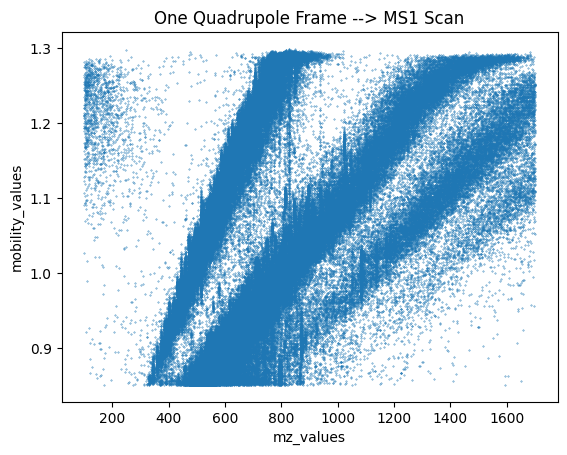

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

df_1frame = data[
    {
        "frame_indices": [1010],
        # "scan_indices": slice(34, 70),
        # "mz_values": slice(800.5, 805.5),
        # "intensity_values": 50,
        "precursor_indices": [0],
    }
]
plt.scatter(df_1frame["mz_values"], df_1frame["mobility_values"], s=0.1)
plt.ylabel("mobility_values")
plt.xlabel("mz_values")
plt.title("One Quadrupole Frame --> MS1 Scan")

Then look into a small region of m/z values

Text(0, 0.5, 'mobility_values')

Text(0.5, 0, 'mz_values')

Text(0.5, 1.0, 'One Quadrupole Frame --> MS1 Scan')

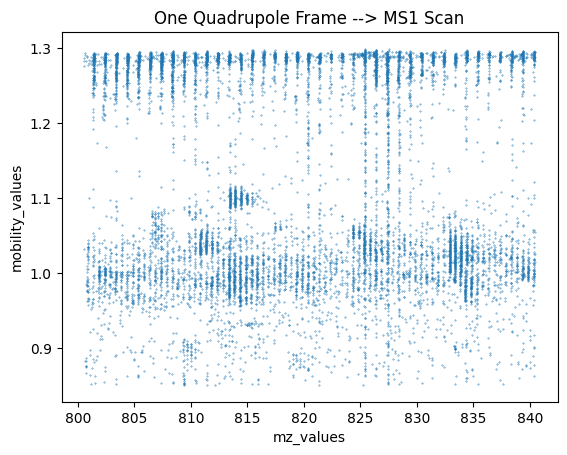

In [72]:
df_1frame = data[
    {
        "frame_indices": [1010],
        # "scan_indices": slice(34, 70),
        "mz_values": slice(800.5, 840.5),
        # "intensity_values": 50,
        "precursor_indices": [0],
    }
]
plt.scatter(df_1frame["mz_values"], df_1frame["mobility_values"], s=0.1)
plt.ylabel("mobility_values")
plt.xlabel("mz_values")
plt.title("One Quadrupole Frame --> MS1 Scan")

<Axes: xlabel='mobility_values', ylabel='Density'>

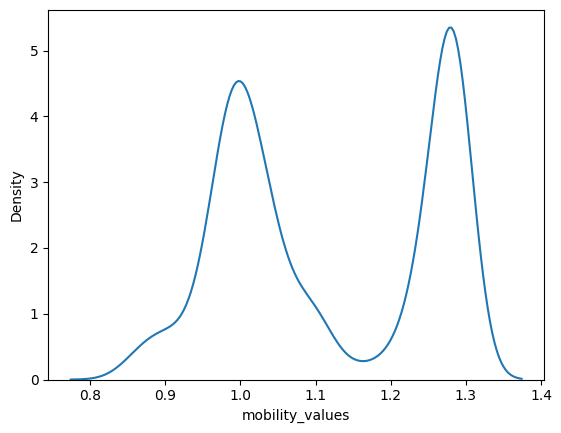

In [66]:
sns.kdeplot(df_1frame["mobility_values"])

Then look into a small region of ion mobility

Text(0, 0.5, 'intensity')

Text(0.5, 0, 'mz_values')

Text(0.5, 1.0, 'One Frame (MS1 Scan)')

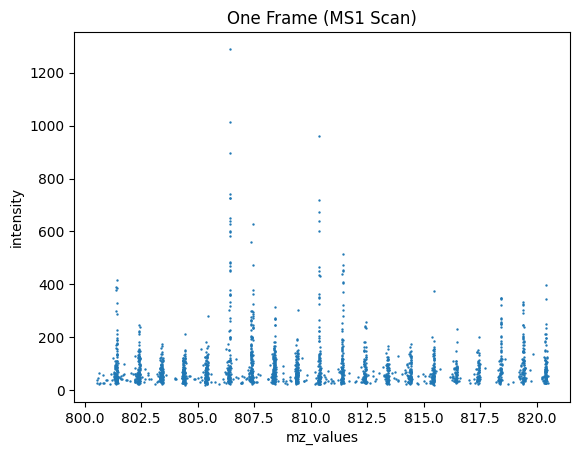

In [67]:
import matplotlib.pyplot as plt

df_1frame = data[
    {
        "frame_indices": [1010],
        # "scan_indices": slice(34, 70),
        "mz_values": slice(800.5, 820.5),
        # "intensity_values": 50,
        "precursor_indices": [0],
        "mobility_values": slice(1.2, 1.3),
    }
]
plt.scatter(df_1frame["mz_values"], df_1frame["intensity_values"], s=0.5)
plt.ylabel("intensity")
plt.xlabel("mz_values")
plt.title("One Frame (MS1 Scan)")

<Axes: xlabel='mz_values', ylabel='Density'>

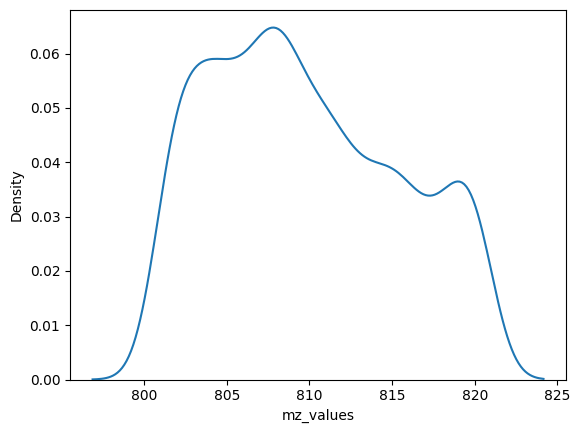

In [69]:
sns.kdeplot(df_1frame["mz_values"])

,raw_indices,frame_indices,scan_indices,precursor_indices,push_indices,tof_indices,rt_values,rt_values_min,mobility_values,quad_low_mz_values,quad_high_mz_values,mz_values,intensity_values,corrected_intensity_values
0,28542619,1002,88,3089,938962,478030,118.17054,1.969509,1.273625,1512.401295,1515.401295,1113.916537,100,100
1,28542626,1002,91,3089,938965,475147,118.17054,1.969509,1.272141,1512.401295,1515.401295,1104.525525,33,33
2,28542636,1002,141,3090,939015,474546,118.17054,1.969509,1.247393,1303.787710,1306.787710,1102.572850,66,66
3,28542698,1002,153,3090,939027,475157,118.17054,1.969509,1.241449,1303.787710,1306.787710,1104.558030,125,125
4,28542775,1002,238,3092,939112,475160,118.17054,1.969509,1.199299,1266.640742,1269.640742,1104.567782,46,46
5,28542853,1002,307,3094,939181,475145,118.17054,1.969509,1.165022,1171.629429,1174.629429,1104.519024,75,75
6,28543043,1002,426,3113,939300,477301,118.17054,1.969509,1.105777,1021.060360,1024.060360,1111.538155,47,47
7,28543072,1002,432,3113,939306,475586,118.17054,1.969509,1.102785,1021.060360,1024.060360,1105.952947,24,24
8,28543165,1002,462,3114,939336,477321,118.17054,1.969509,1.087821,843.352622,846.352622,1111.603372,56,56
9,28543203,1002,474,3115,939348,474838,118.17054,1.969509,1.081833,1043.449531,1046.449531,1103.521355,77,77


Text(0.5, 0, 'mobility_values')

Text(0, 0.5, 'mz_values')

Text(0.5, 1.0, 'One Frame (MS1 Scan)')

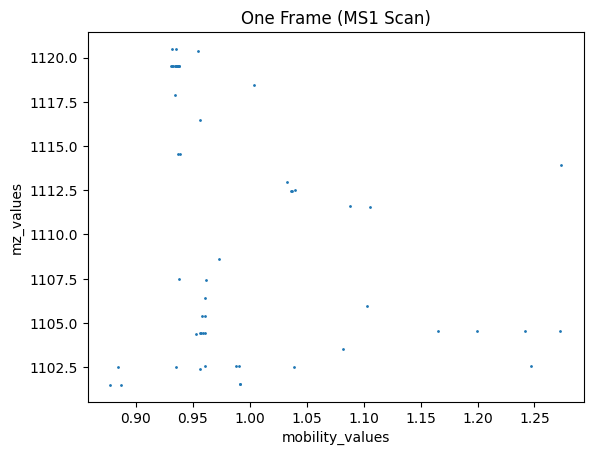

In [89]:
import seaborn as sns


df_frame1_scan1_mz400 = data[
    {
        "frame_indices": [1002],
        # "scan_indices": slice(34, 70),
        "mz_values": slice(1100.0, 1120.5),
        # "intensity_values": 50,
    }
]
# sns.heatmap(
#     df_frame1_scan1_mz400.pivot(
#         index="mz_values",
#         columns="scan_indices",
#         values="intensity_values",
#     ),
#     annot=True,
#     cmap="crest",
# )
df_frame1_scan1_mz400
plt.scatter(
    df_frame1_scan1_mz400["mobility_values"], df_frame1_scan1_mz400["mz_values"], s=1
)
plt.xlabel("mobility_values")
plt.ylabel("mz_values")
plt.title("One Frame (MS1 Scan)")

In [92]:
df_frame1_scan1_mz400.sort_values("scan_indices", ascending=True)

,raw_indices,frame_indices,scan_indices,precursor_indices,push_indices,tof_indices,rt_values,rt_values_min,mobility_values,quad_low_mz_values,quad_high_mz_values,mz_values,intensity_values,corrected_intensity_values
0,28542619,1002,88,3089,938962,478030,118.17054,1.969509,1.273625,1512.401295,1515.401295,1113.916537,100,100
1,28542626,1002,91,3089,938965,475147,118.17054,1.969509,1.272141,1512.401295,1515.401295,1104.525525,33,33
2,28542636,1002,141,3090,939015,474546,118.17054,1.969509,1.247393,1303.787710,1306.787710,1102.572850,66,66
3,28542698,1002,153,3090,939027,475157,118.17054,1.969509,1.241449,1303.787710,1306.787710,1104.558030,125,125
4,28542775,1002,238,3092,939112,475160,118.17054,1.969509,1.199299,1266.640742,1269.640742,1104.567782,46,46
5,28542853,1002,307,3094,939181,475145,118.17054,1.969509,1.165022,1171.629429,1174.629429,1104.519024,75,75
6,28543043,1002,426,3113,939300,477301,118.17054,1.969509,1.105777,1021.060360,1024.060360,1111.538155,47,47
7,28543072,1002,432,3113,939306,475586,118.17054,1.969509,1.102785,1021.060360,1024.060360,1105.952947,24,24
8,28543165,1002,462,3114,939336,477321,118.17054,1.969509,1.087821,843.352622,846.352622,1111.603372,56,56
9,28543203,1002,474,3115,939348,474838,118.17054,1.969509,1.081833,1043.449531,1046.449531,1103.521355,77,77


,raw_indices,frame_indices,scan_indices,precursor_indices,push_indices,tof_indices,rt_values,rt_values_min,mobility_values,quad_low_mz_values,quad_high_mz_values,mz_values,intensity_values,corrected_intensity_values
0,218,1,36,0,973,374478,1.001538,0.016692,1.299331,-1.0,-1.0,801.537958,79,79
1,1828,1,66,0,1003,374461,1.001538,0.016692,1.284504,-1.0,-1.0,801.490886,97,97
2,3275,1,145,0,1082,373535,1.001538,0.016692,1.245412,-1.0,-1.0,798.928920,68,68
3,4209,1,195,0,1132,374418,1.001538,0.016692,1.220632,-1.0,-1.0,801.371827,50,50
4,4233,1,196,0,1133,374362,1.001538,0.016692,1.220136,-1.0,-1.0,801.216787,109,109
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,19307,1,829,0,1766,374295,1.001538,0.016692,0.903911,-1.0,-1.0,801.031312,107,107
60,19663,1,850,0,1787,374194,1.001538,0.016692,0.893339,-1.0,-1.0,800.751756,75,75
61,19884,1,862,0,1799,373389,1.001538,0.016692,0.887296,-1.0,-1.0,798.525356,93,93
62,19905,1,863,0,1800,374115,1.001538,0.016692,0.886792,-1.0,-1.0,800.533127,29,29


Text(0.5, 0, 'mobility_values')

Text(0, 0.5, 'mz_values')

Text(0.5, 1.0, 'One Frame (MS1 Scan)')

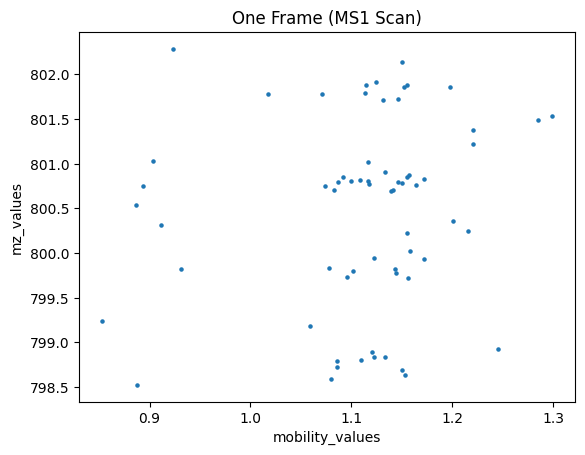

In [62]:
df_frame1_scan1_mz400 = data[
    {
        "frame_indices": [1],
        # "scan_indices": slice(34, 70),
        "mz_values": slice(798.5, 802.5),
        # "intensity_values": 50,
    }
]
# sns.heatmap(
#     df_frame1_scan1_mz400.pivot(
#         index="mz_values",
#         columns="scan_indices",
#         values="intensity_values",
#     ),
#     annot=True,
#     cmap="crest",
# )
df_frame1_scan1_mz400
plt.scatter(
    df_frame1_scan1_mz400["mobility_values"], df_frame1_scan1_mz400["mz_values"], s=5
)
plt.xlabel("mobility_values")
plt.ylabel("mz_values")
plt.title("One Frame (MS1 Scan)")

## Bin intensities

In [ ]:
import numpy as np

a = data.bin_intensities(
    df_1frame["raw_indices"],
    axis=["mz_values"],
)

In [ ]:
non_zero_idx = np.nonzero(a)
non_zero_mz = data.mz_values[non_zero_idx[0]]
non_zero_int = a[non_zero_idx]
frame_mz_int = pd.DataFrame(
    {
        "mz_indices": non_zero_idx[0],
        "mz_values": non_zero_mz,
        "intensity_values": non_zero_int,
    }
)

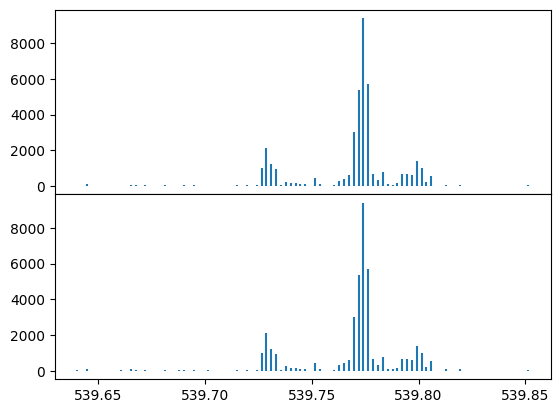

In [145]:
from utils.plot import plot_true_and_predict

plot_true_and_predict(
    x=frame_mz_int["mz_values"][15220:15270],
    true=frame_mz_int["intensity_values"][15220:15270],
    prediction=frame_mz_int["intensity_values"][15220:15270],
    log=False,
)

(array([ 300.,  206.,  186.,  139.,  147.,  125.,   87.,   87.,   59.,
          66.,   50.,   43.,   49.,   54.,   98.,  201.,  286.,  434.,
         576.,  683.,  650.,  730.,  857., 1450., 1694., 2056., 2376.,
        3087., 3170., 3125., 3355., 3191., 2726., 2773., 2708., 2613.,
        2745., 2527., 2549., 2274., 2341., 2223., 2388., 1871., 1776.,
        1709., 1717., 1436., 1370., 1280., 1108., 1046.,  950.,  987.,
        1050.,  996.,  897.,  996.,  879.,  928.,  799., 1048., 1026.,
         994.,  996.,  945.,  965., 1070., 1053., 1045., 1055.,  997.,
         982., 1039.,  993., 1081., 1016., 1005., 1045.,  911.,  904.,
         882.,  876.,  857.,  840.,  919.,  744.,  761.,  742.,  693.,
         696.,  615.,  603.,  632.,  597.,  528.,  507.,  461.,  455.,
         432.]),
 array([ 100.0098796 ,  116.0096687 ,  132.0094578 ,  148.00924691,
         164.00903601,  180.00882512,  196.00861422,  212.00840333,
         228.00819243,  244.00798153,  260.00777064,  276.00755974

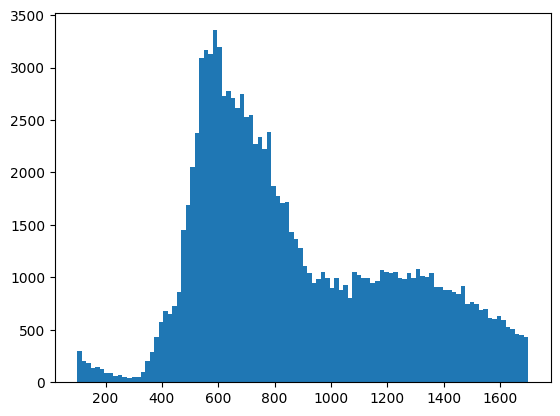

In [ ]:
plt.hist(non_zero_mz, bins=100)

<Axes: >

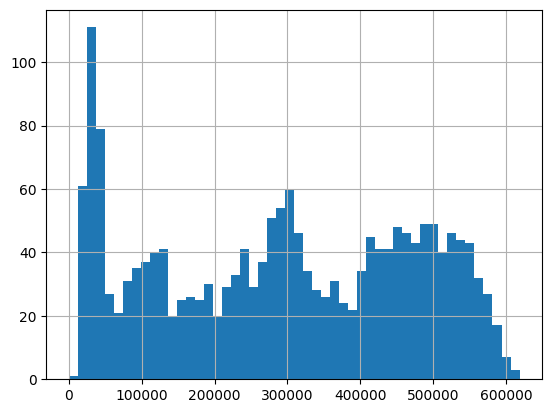

In [ ]:
q_frame.NumPeaks.hist(bins=50)

<Axes: xlabel='intensity_values', ylabel='Density'>

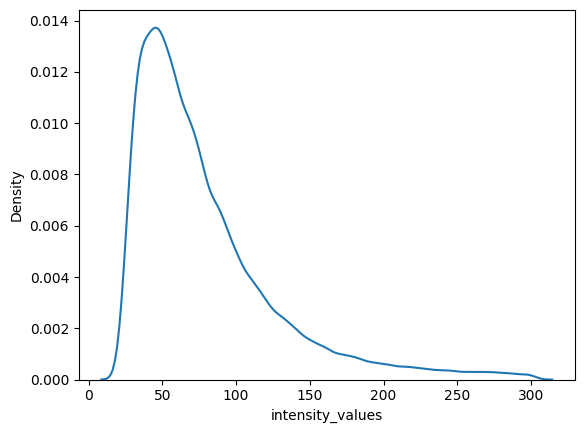

In [ ]:
sns.kdeplot(df_1frame.loc[df_1frame["intensity_values"]
            <= 302, "intensity_values"])

from timspy.df import TimsPyDF
from pprint import pprint

tims_sample_path = "/cmnfs/proj/ORIGINS/data/tims_sample/20200428_Evosep_60SPD_SG06-16_MLHeLa_200ng_py8_S3-A4_1_2450.d"
D = TimsPyDF(tims_sample_path)